# Знакомство с библиотеками numpy и matplotlib

## Про numpy

In [1]:
import numpy as np

### Решение задачи о пьянице

In [1]:
import random

N = 10
res = [0]
for i in range(10):
    p = random.random()
    if p<0.5:
        res.append(1+res[i])
    else:
        res.append(-1+res[i])
print(res)

[0, 1, 2, 1, 0, 1, 2, 3, 2, 1, 2]


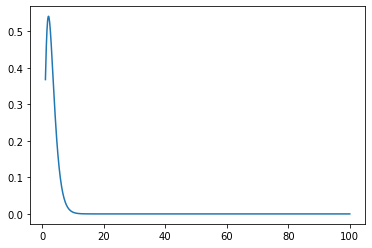

In [3]:
import matplotlib.pyplot as plt
x = np.linspace(1,100,1000)
y = x**2*np.exp(-x)
plt.plot(x,y)

In [4]:
res = np.cumsum(np.random.choice([1,-1], 10))
res

array([-1, -2, -3, -2, -3, -4, -5, -4, -3, -2])

### Задача №1 из домашнего задания

Есть список a = [1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89].

Выведите все элементы, которые меньше 5.

In [11]:
a = np.array([1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89])

a[a<5]=5
a

array([ 5,  5,  5,  5,  5,  8, 13, 21, 34, 55, 89])

### применение функции к массиву

In [5]:
import math
a = list(range(20))
sqrt_a = [math.sqrt(i) for i in a]

In [6]:
a = np.arange(20)
sqrt_a = np.sqrt(a)

### Более сложные функции

$$f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp(-\frac{(x-\mu)^2}{2\sigma^2})$$

In [12]:
def gauss_distrib(x, sigma, mu):
    return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2/(2*sigma**2))

### Чтение из текстового файла

In [15]:
data = np.genfromtxt('ZrO2_20%Y2O3_1.xy', encoding='cp1252', comments='!')
data

array([[ 25.  ,   4.9 ],
       [ 25.05,   4.9 ],
       [ 25.1 ,   3.6 ],
       ...,
       [ 99.9 ,   1.3 ],
       [ 99.95,   2.1 ],
       [100.  ,   2.6 ]])

In [14]:
data.shape

(1501, 2)

In [16]:
data = data.T #Транспонируем матрицу

In [18]:
data.shape
data

array([[ 25.  ,  25.05,  25.1 , ...,  99.9 ,  99.95, 100.  ],
       [  4.9 ,   4.9 ,   3.6 , ...,   1.3 ,   2.1 ,   2.6 ]])

In [19]:
two_theta = data[0]
intensity = data[1]


## Про matplotlib

In [20]:
import matplotlib.pyplot as plt

## Нарисуем простой график по данным, импортированным из файла


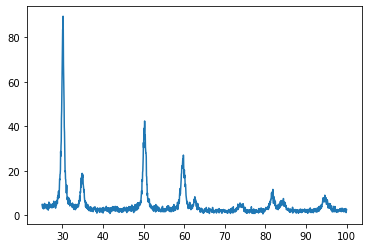

In [21]:
plt.plot(two_theta, intensity)
plt.show()

### Сделаем график чуть более красивым 


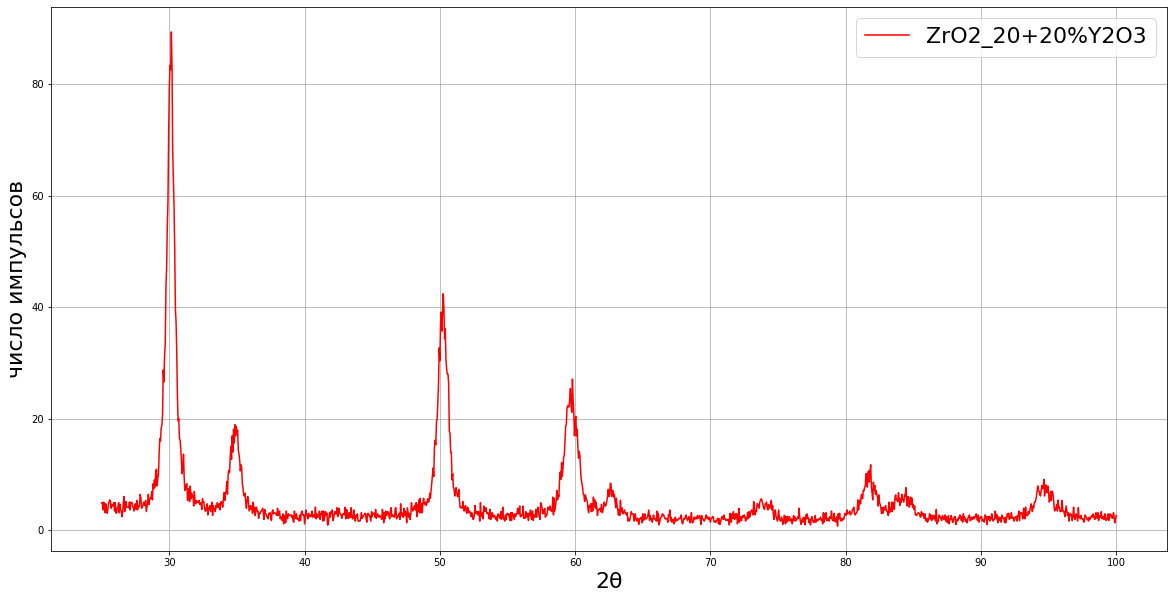

In [22]:
import matplotlib

plt.figure(figsize = (20,10)) 
plt.grid()


plt.plot(two_theta,intensity, color = 'r' , label = 'ZrO2_20+20%Y2O3')
plt.xlabel('2θ', fontsize=22)
plt.ylabel('число импульсов', fontsize=22)
plt.legend(fontsize=22)

### Выделим диапазон первого пика 

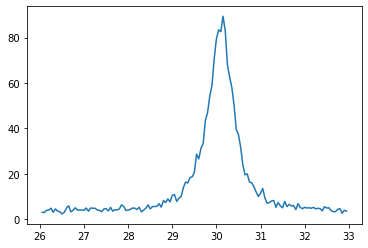

In [23]:
mask = (two_theta>26)*(two_theta<33)
plt.plot(two_theta[mask], intensity[mask])

### воспользуемся функцией Гаусса, чтобы аппроксимировать кривую

In [24]:
def gauss(x,a,b,c):
    return a*np.exp(-(x-b)**2/(2*c**2))

In [26]:
from scipy.optimize import curve_fit

`scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(- inf, inf), method=None, jac=None, *, full_output=False, **kwargs)`

In [27]:
popt, pcov = curve_fit(f=gauss, xdata=two_theta[mask], ydata=intensity[mask], p0=[75,30,2])
popt

array([76.19434938, 30.09798008,  0.3686603 ])

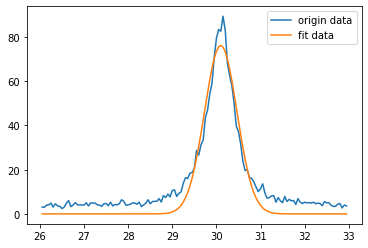

In [28]:
plt.plot(two_theta[mask], intensity[mask], label = 'origin data')
plt.plot(two_theta[mask], gauss(two_theta[mask], *popt), label = 'fit data')
plt.legend()